<a href="https://colab.research.google.com/github/kuolunwang/Image-Processing/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# library
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# load picture from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loaded the image in grayscale
image = cv2.imread('/content/drive/My Drive/Bird 2.tif',0)

# convert from uint8 into float32
image_float32 = np.float32(image)

# Computed the 2-d discrete Fourier Transform
dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum.
dft_shift = np.fft.fftshift(dft) 

# compute magnitude spectrum in log scale
one = np.ones(dft_shift.shape[:2])
magnitude_spectrum =np.log(one+cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) 

In [ ]:
# split whole frequency region to half left
x = magnitude_spectrum[0:512,0:256]

# transfrom to 1 dimension
t = x.ravel()

In [ ]:
# get top 25 DFT frequency
y = t.argsort()[-25:]

In [ ]:
# get position (u,v) of top 25 DFT frequency
pos = []
for i in y:
  pos.append([i//256,i%256])
pos.reverse()

In [ ]:
# list top 25 DFT frequency
pos

[[256, 254],
 [256, 255],
 [255, 255],
 [257, 255],
 [257, 254],
 [253, 255],
 [259, 254],
 [258, 255],
 [259, 255],
 [253, 254],
 [256, 253],
 [258, 252],
 [254, 254],
 [258, 253],
 [252, 253],
 [248, 255],
 [254, 255],
 [254, 252],
 [260, 254],
 [262, 255],
 [254, 253],
 [255, 252],
 [255, 254],
 [252, 255],
 [261, 254]]

Text(0.5, 1.0, 'Magnitude Spectrum')

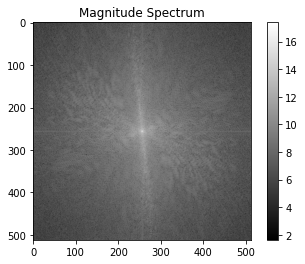

In [ ]:
# plot magnitude spectrum
plt.imshow(magnitude_spectrum, cmap = "gray")
plt.colorbar()
plt.title("Magnitude Spectrum")

In [ ]:
# discrete fourier transform
dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

# shift to center
dft_shift = np.fft.fftshift(dft)

In [ ]:
# create a ideal low pass filter and ideal high pass filter
def ILPF(diameter,shape):

  result = np.zeros(shape,dtype=np.uint8)
  center = [(shape[0]-1)/2,(shape[1]-1)/2]

  for i in range(shape[0]):
    for j in range(shape[1]):
      if(((i-center[0])**2+(j-center[1])**2)**0.5<diameter):
        result[i,j]=1
  return result

def IHPF(diameter,shape):

  result = np.zeros(shape,dtype=np.uint8)
  center = [(shape[0]-1)/2,(shape[1]-1)/2]

  for i in range(shape[0]):
    for j in range(shape[1]):
      if(((i-center[0])**2+(j-center[1])**2)**0.5>=diameter):
        result[i,j]=1
  return result

In [ ]:
# implement ideal low pass filter and high pss filter
low = ILPF(30,image.shape[:2])
high = IHPF(30,image.shape[:2])

In [ ]:
# apply mask and inverse DFT
fshift = np.zeros(dft_shift.shape)
for i in range(dft_shift.shape[2]):
  fshift[:,:,i] = dft_shift[:,:,i]*low
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

Text(0.5, 1.0, 'output image for ideal low pass filter')

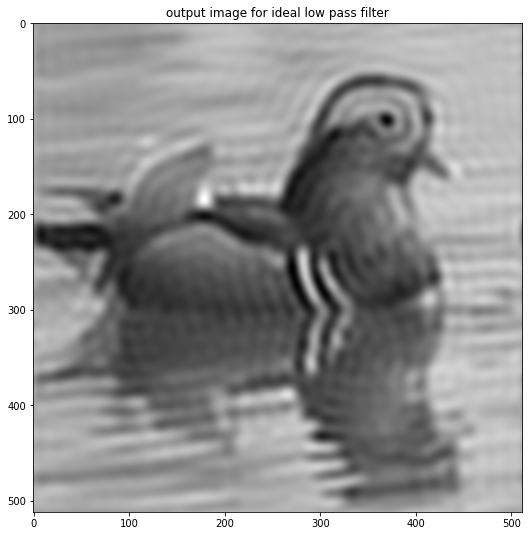

In [ ]:
# plot image by using ideal low pass filter
plt.figure(figsize=(15,9))
plt.imshow(img_back, cmap = "gray")
plt.title("output image for ideal low pass filter")

In [ ]:
# apply mask and inverse DFT
fshift = np.zeros(dft_shift.shape)
for i in range(dft_shift.shape[2]):
  fshift[:,:,i] = dft_shift[:,:,i]*high
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

Text(0.5, 1.0, 'output image for ideal high pass filter')

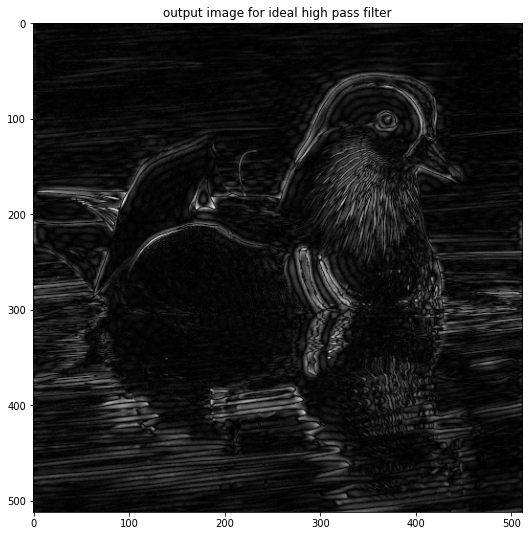

In [ ]:
# plot image by using ideal high pass filter
plt.figure(figsize=(15,9))
plt.imshow(img_back, cmap = "gray")
plt.title("output image for ideal high pass filter")